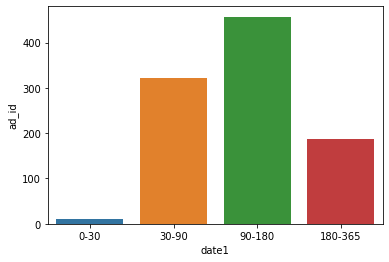

In [122]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
ads_data         = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-zakorko/shared/homeworks/python_ds_miniprojects/6/ads_data.csv')
ads_clients_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-zakorko/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv')
# df = ads_data.query("event == 'view'")
# df['count1']=1
# df = df.groupby(['ad_id','date'],as_index=False).agg({'count1':'count'})
# df = df.groupby('date',as_index=False).agg({'count1':'mean'})
# df = (df.count1 - df.count1.rolling(2).mean()).abs()
# df



#Конвертация дат в формат datetime
ads_data['date'] = pd.to_datetime(ads_data['date'])
ads_clients_data['create_date'] = pd.to_datetime(ads_clients_data['create_date'])

#Объединение данных о рекламе и рекламных клиентах по client_union_id
merged_data = pd.merge(ads_data, ads_clients_data, on='client_union_id')
merged_data
# #Вычисляем разницу в днях между датой создания клиента и датой запуска первой рекламы
# merged_data['days_difference'] = (merged_data['date_x'] - merged_data['create_date']).dt.days

# #3Группируем данные по client_union_id, чтобы найти первую дату показа рекламы для каждого клиента
# first_ad_date = merged_data[merged_data['event'] == 'view'].groupby('client_union_id')['date_x'].min().reset_index()

# #Объединяем данные о первом показе с данными о создании клиента
# first_ad_date = pd.merge(first_ad_date, ads_clients_data, on='client_union_id')

# #Вычисляем разницу в днях для каждого клиента
# first_ad_date['days_difference'] = (first_ad_date['date_x'] - first_ad_date['create_date']).dt.days

# #Находим среднее значение разницы в днях
# average_days = first_ad_date['days_difference'].mean()
# average_days
# merged_data['date']= (merged_data.date_x-merged_data.create_date).dt.days
# merged_data.query('date<=365')



# #Отфильтровываем тех клиентов, которые запустили рекламу в течение 365 дней
# conversion_data = merged_data[merged_data['days_difference'] <= 365]

# #Группируем данные по client_union_id, чтобы найти клиентов, запустивших рекламу
# clients_with_ads = conversion_data.groupby('client_union_id').size().reset_index(name='ads_count')

# #Находим общее число клиентов, создавших кабинет
# total_clients = ads_clients_data['client_union_id'].nunique()

# #Находим число клиентов, запустивших рекламу
# clients_started_ads = clients_with_ads['client_union_id'].nunique()

# #Вычисляем конверсию
# conversion_rate = (clients_started_ads / total_clients) * 100

# #Округляем до двух знаков после запятой
# conversion_rate = round(conversion_rate, 2)
# conversion_rate







#Определение бинов для категорий
bins = [pd.Timedelta(days=0), pd.Timedelta(days=30), pd.Timedelta(days=90), pd.Timedelta(days=180), pd.Timedelta(days=365)]

#Определение названий для категорий
labels = ['0-30', '30-90', '90-180', '180-365']

#Создание новой категориальной колонки в DataFrame
merged_data['date']= (merged_data.date_x-merged_data.create_date)
merged_data['date1'] = pd.cut(merged_data['date'], bins=bins, labels=labels, right=False)
merged_data = merged_data.groupby('date1',as_index=False).agg({'ad_id':'nunique'})
sns.barplot(data=merged_data, x = 'date1', y = 'ad_id')